<a href="https://colab.research.google.com/github/mwolinsky/TP_ESTADISTICA_ESPACIAL/blob/main/Nicol%C3%A1s_Kossacoff_y_Mat%C3%ADas_Wolinsky_TP_Estad%C3%ADstica_Espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalación, librerías y archivos

In [3]:
!pip install rasterio

In [4]:
import numpy as np
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from sklearn.cluster import KMeans
from shapely.geometry import Point
import matplotlib.colors as mcolors

#  1. Klorofila


## Levantamos los archivos tiff

In [24]:
from google.colab import auth
from googleapiclient.discovery import build

auth.authenticate_user()
drive_service = build('drive', 'v3')

In [59]:
import os
import gdown

# ID de la carpeta de Google Drive (lo encuentras en la URL después de "folders/")
folder_id = "1sstWDS_Acc7O3a2oiAB6a80LgZPn42ma"

# Crear la carpeta de destino en Colab
save_path = "/content/tiff_files"
os.makedirs(save_path, exist_ok=True)

# Buscar archivos en la carpeta
query = f"'{folder_id}' in parents and mimeType='image/tiff'"
results = drive_service.files().list(q=query).execute()
files = results.get('files', [])

# Descargar archivos automáticamente
for file in files:
    file_id = file['id']
    file_name = file['name']
    print(f"Descargando: {file_name}")
    gdown.download(f"https://drive.google.com/uc?id={file_id}", os.path.join(save_path, file_name), quiet=False)

print("Todos los archivos TIFF han sido descargados.")


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B12_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1DNFbPh5HbW8LFhMEaQpd6fg6ijOT7b9A
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B12_(Raw).tiff
100%|██████████| 9.50M/9.50M [00:00<00:00, 17.8MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B11_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1V64Qa6zm6KM_WuppQHZwRbb3naP9Z8SC
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B11_(Raw).tiff
100%|██████████| 9.20M/9.20M [00:00<00:00, 39.0MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B09_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1KWlFNlVaAaEN0HAEJguCbXtcEB4ICmqd
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B09_(Raw).tiff
100%|██████████| 8.68M/8.68M [00:00<00:00, 84.8MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B8A_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1Qgmq2p6maIGQNvgtv9gGy7wrSleKnCqf
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B8A_(Raw).tiff
100%|██████████| 9.67M/9.67M [00:00<00:00, 134MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B08_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1vQklazGzb0hKgLMrDL1KEl_CR-izc53v
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B08_(Raw).tiff
100%|██████████| 9.03M/9.03M [00:00<00:00, 41.2MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B07_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1R79DJCh58k0XltN1idW29x6puXxEBqcl
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B07_(Raw).tiff
100%|██████████| 9.71M/9.71M [00:00<00:00, 27.6MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B06_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1AHiS8BfcXjCglLjupbiUeJyOt6nvCvff
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B06_(Raw).tiff
100%|██████████| 9.60M/9.60M [00:00<00:00, 33.0MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B05_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1YKFBabxRhuB9VNbUyDT7_SRn7xqpFJ95
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B05_(Raw).tiff
100%|██████████| 9.56M/9.56M [00:00<00:00, 34.6MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B04_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1Pz2kj7buBZVi6Mdqiv7lWJm4sISBYAOD
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B04_(Raw).tiff
100%|██████████| 9.11M/9.11M [00:00<00:00, 36.8MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B03_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1FWHSNSCYPZK1NqVHX0rrmj3N_-2sIyyM
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B03_(Raw).tiff
100%|██████████| 9.03M/9.03M [00:00<00:00, 65.8MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B02_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=13PVwO-my3CZEq9Rakmtei0nxQGByqpAc
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B02_(Raw).tiff
100%|██████████| 9.15M/9.15M [00:00<00:00, 33.2MB/s]


Descargando: 2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B01_(Raw).tiff


Downloading...
From: https://drive.google.com/uc?id=1WasmbCFSJ4OZ-O-cEl6hgJieHXJ9Bhav
To: /content/tiff_files/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B01_(Raw).tiff
100%|██████████| 8.28M/8.28M [00:00<00:00, 45.4MB/s]

Todos los archivos TIFF han sido descargados.


In [26]:
import os
import numpy as np
import rasterio

# Carpeta donde están los archivos TIFF
tiff_folder = "/content/tiff_files"

# Obtener todas las rutas de archivos .tiff en la carpeta
rutas_tiff = sorted([os.path.join(tiff_folder, f) for f in os.listdir(tiff_folder) if f.endswith(".tiff")])

def cargar_bandas_tiff(rutas):
    """
    Carga múltiples imágenes .tiff y las devuelve como un array tridimensional
    """
    bandas = []
    for ruta in rutas:
        with rasterio.open(ruta) as src:
            banda = src.read(1).astype(np.float32)  # Convertir a float32 para normalizar
            min_val, max_val = banda.min(), banda.max()
            if max_val > min_val:
                banda = (banda - min_val) / (max_val - min_val)  # Normalizar entre 0 y 1
            bandas.append(banda)

    return np.stack(bandas) if bandas else None

# Cargar todas las bandas de los archivos TIFF
imagenes_tiff = cargar_bandas_tiff(rutas_tiff)

# Verificar que se cargaron correctamente
if imagenes_tiff is not None:
    print(f"Se cargaron {imagenes_tiff.shape[0]} bandas con tamaño {imagenes_tiff.shape[1:]} cada una.")
else:
    print("No se encontraron archivos TIFF o hubo un problema al cargarlos.")


Se cargaron 12 bandas con tamaño (1773, 2500) cada una.


In [30]:
imagenes_tiff.shape

(12, 1773, 2500)

## 1. Entrenamos K-Means con 4 categorías

In [52]:
def entrenar_kmeans(datos, n_clusters=6):
    """Entrena un clasificador K-means con los datos de píxeles"""
    # Reshape para que cada fila sea un píxel y cada columna una banda
    n_bandas, altura, anchura = datos.shape
    datos_reshape = datos.reshape(n_bandas, altura * anchura).T

    # Entrenar el clasificador
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(datos_reshape)

    # Obtener las etiquetas
    etiquetas = kmeans.predict(datos_reshape)

    # Reshape de vuelta a la forma de la imagen
    etiquetas_reshape = etiquetas.reshape(altura, anchura)

    return kmeans, etiquetas_reshape

In [55]:
kmeans, clasificacion = entrenar_kmeans(imagenes_tiff, n_clusters = 3)

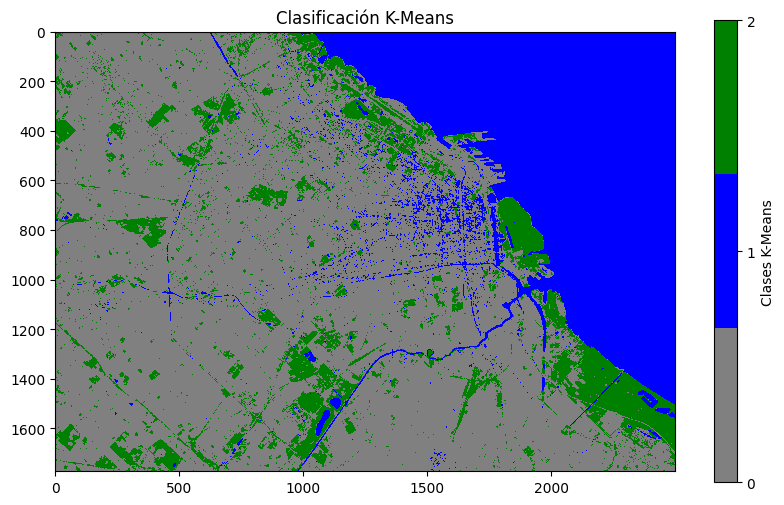

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

def plot_kmeans_labels(etiquetas, n_clusters):
    """Grafica la clasificación de K-Means con colores discretos"""

    # Definir una paleta de colores discreta
    colores = ['grey', 'blue', 'green', 'yellow', 'purple', 'orange', 'brown', 'pink']
    colores = colores[:n_clusters]  # Limitar a la cantidad de clusters
    cmap = mcolors.ListedColormap(colores)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))
    plt.imshow(etiquetas, cmap=cmap, interpolation='nearest')

    # Crear la barra de colores con etiquetas discretas
    cbar = plt.colorbar(ticks=np.arange(n_clusters))
    cbar.set_label("Clases K-Means")
    cbar.set_ticks(np.arange(n_clusters))

    # Agregar título
    plt.title("Clasificación K-Means")
    plt.show()

# Ejemplo de uso
plot_kmeans_labels(clasificacion, n_clusters=3)


- Agua --> 1
- Vegetación --> 2
- Urbano --> 0

In [5]:
import os
import numpy as np
import rasterio

def cargar_bandas_sentinel(path_base):
    """Carga todas las bandas Sentinel-2 desde archivos .tiff y las devuelve como un array tridimensional"""
    bandas = []

    for i in range(1, 13):  # Ajustar según la cantidad de bandas disponibles
        file_path = os.path.join(path_base, f"B{i}.tiff")

        if not os.path.exists(file_path):
            print(f"Advertencia: No se encontró {file_path}, se omitirá.")
            continue

        with rasterio.open(file_path) as src:
            banda = src.read(1).astype(np.float32)

            # Evitar divisiones por cero en normalización
            min_val, max_val = banda.min(), banda.max()
            if max_val > min_val:
                banda = (banda - min_val) / (max_val - min_val)
            else:
                banda = np.zeros_like(banda)  # Si la banda es constante, poner ceros

            bandas.append(banda)

    if not bandas:
        raise ValueError("No se encontraron bandas válidas en el directorio.")

    # Convertir la lista de bandas en un array tridimensional (bandas, altura, anchura)
    return np.stack(bandas)

# Ejemplo de uso:
# path_base = "ruta_a_tu_carpeta_con_tiffs"
# imagen_sentinel = cargar_bandas_sentinel(path_base)


In [6]:
def calcular_ndvi(bandas):
    """Calcula el índice NDVI utilizando las bandas 4 (rojo) y 8 (NIR)"""
    B4 = bandas[3]  # Índice 3 corresponde a la banda 4
    B8 = bandas[7]  # Índice 7 corresponde a la banda 8

    # Evitar división por cero
    denominador = B8 + B4
    ndvi = np.zeros_like(B4)
    mask = denominador != 0
    ndvi[mask] = (B8[mask] - B4[mask]) / denominador[mask]

    return ndvi


In [7]:
def entrenar_kmeans(datos, n_clusters=6):
    """Entrena un clasificador K-means con los datos de píxeles"""
    # Reshape para que cada fila sea un píxel y cada columna una banda
    n_bandas, altura, anchura = datos.shape
    datos_reshape = datos.reshape(n_bandas, altura * anchura).T

    # Entrenar el clasificador
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(datos_reshape)

    # Obtener las etiquetas
    etiquetas = kmeans.predict(datos_reshape)

    # Reshape de vuelta a la forma de la imagen
    etiquetas_reshape = etiquetas.reshape(altura, anchura)

    return kmeans, etiquetas_reshape

## 2. Polígonos de espacios verdes

In [58]:
import geopandas as gpd
import pandas as pd
from sklearn.cluster import KMeans
from shapely.geometry import Point
import matplotlib.colors as mcolors

In [69]:
# ID de la carpeta en Google Drive
folder_id = "1xzleMmpLc9WaBWhh6NRiQ_kXvBRkGDB0"

# Crear carpeta de destino en Colab
save_path = "/content/geojsons_files"
os.makedirs(save_path, exist_ok=True)

# Buscar todos los archivos en la carpeta
query = f"'{folder_id}' in parents"
results = drive_service.files().list(q=query).execute()
files = results.get("files", [])

# Filtrar solo archivos que terminan en ".geojson"
geojson_files = [file for file in files if file["name"].lower().endswith(".geojson")]

if not geojson_files:
    print("No se encontraron archivos GEOJSON en la carpeta.")
else:
    for file in geojson_files:
        file_id = file["id"]
        file_name = file["name"]
        print(f"Descargando: {file_name}")

        # Descargar usando la API de Google Drive
        request = drive_service.files().get_media(fileId=file_id)
        file_path = os.path.join(save_path, file_name)

        with open(file_path, "wb") as f:
            downloader = MediaIoBaseDownload(f, request)
            done = False
            while not done:
                status, done = downloader.next_chunk()
                print(f"Progreso: {int(status.progress() * 100)}%")

    print("✅ Todos los archivos GEOJSON han sido descargados correctamente.")


Descargando: espacio_verde_publico.geojson
Progreso: 100%
Descargando: espacio_verde_privado.geojson
Progreso: 100%
✅ Todos los archivos GEOJSON han sido descargados correctamente.


In [71]:
# Now you can open the GeoJSON files:
import geopandas as gpd
geojson_files_path = "/content/geojsons_files"

file_paths = []
for filename in os.listdir(geojson_files_path):
    if filename.endswith(".geojson"):
        file_path = os.path.join(geojson_files_path, filename)
        file_paths.append(file_path)

In [72]:
file_paths

['/content/geojsons_files/espacio_verde_privado.geojson',
 '/content/geojsons_files/espacio_verde_publico.geojson']

In [73]:
espacios_verdes_publicos = gpd.read_file(file_paths[1])
espacios_verdes_privados = gpd.read_file(file_paths[0])


In [75]:
# Combinar espacios verdes y quedarse con el 20% más grande
espacios_verdes = pd.concat([espacios_verdes_publicos, espacios_verdes_privados])
espacios_verdes['area'] = espacios_verdes.geometry.area
espacios_verdes = espacios_verdes.sort_values('area', ascending=False)
espacios_verdes_20_Bigger = espacios_verdes.head(int(len(espacios_verdes) * 0.2))

<ipython-input-75-8b6b1ea66dc1>:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  espacios_verdes['area'] = espacios_verdes.geometry.area


In [76]:
espacios_verdes_20_Bigger

,id,nombre,nom_mapa,barrio,comuna,ubicacion,clasificac,tiene_pati,apadrinada,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,area,perimetro,observacio,geometry,nombre_ori
1160,1274,Reserva Ecológica,Reserva Ecológica,Puerto Madero,1,"NOEL, CARLOS M., INT., AV. - RIO DE LA PLATA -...",PARQUE SEMIPÚBLICO,NO,NO,151,14/07/1980,43.609,NaT,18.583,1989-07-27 00:00:00,2.281755e-04,39273.292782,None,"MULTIPOLYGON (((-58.35416 -34.61999, -58.35419...",NaN
1,612,Autódromo Municipal Oscar A. Gálvez,NaN,VILLA RIACHUELO,Comuna 8,None,NaN,NaN,NaN,None,None,None,None,None,None,1.516836e-04,70563.279439,Redigitalizado en varios sectores por USIG en ...,"MULTIPOLYGON (((-58.46082 -34.70181, -58.46086...",AUTODROMO MUNICIPAL DE LA CIUDAD DE BUENOS AIR...
556,652,Gral. Paz,Plzta. Gral. Paz,Villa Real,10,None,PLAZOLETA,NO,None,None,None,None,NaT,None,NaT,1.057830e-04,152526.501897,None,"MULTIPOLYGON (((-58.46183 -34.70502, -58.4618 ...",NaN
834,943,Parque Indoamericano,Pque. Indoamericano,Villa Soldati,8,"LACARRA, AV. - ESCALADA, AV. - CASTAÑARES, AV....",PARQUE,SI,None,None,None,None,NaT,None,NaT,8.498532e-05,49963.816996,Redig. por USIG Octubre 2014. Redigit. en Abri...,"MULTIPOLYGON (((-58.46074 -34.67093, -58.46074...",NaN
877,1110,Parque de las Victorias,Pque. de las Victorias,Villa Lugano,8,"LARRAZABAL, AV. - FERNANDEZ DE LA CRUZ, FRANCI...",PARQUE,SI,NO,None,None,37.597,NaT,16.752,1982-04-06 00:00:00,7.402126e-05,34512.128902,Modificado en el sector Noreste pegado a la Av...,"MULTIPOLYGON (((-58.4564 -34.68511, -58.45641 ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,1996,None,None,Barracas,4,SUAREZ - LUNA - ASTOR PIAZZOLLA - MONTESQUIEU,PLAZOLETA,NO,None,None,None,None,NaT,None,NaT,5.005076e-07,649.431062,Espacios agregados en Febrero 2022 ante la Ley...,"MULTIPOLYGON (((-58.39772 -34.6461, -58.39776 ...",NaN
481,531,Hidroavión Buenos Aires,Hidroavión Buenos Aires,Palermo,14,"OBLIGADO, RAFAEL AV. COSTANERA (FRENTE AL AERO...",CANTERO CENTRAL,SI,NO,None,None,33.136,NaT,15.383,1976-11-01 00:00:00,5.001299e-07,1401.410359,None,"MULTIPOLYGON (((-58.4106 -34.55752, -58.41056 ...",NaN
433,887,None,NaN,VILLA SOLDATI,Comuna 8,PERGAMINO - RABANAL INT FRANCISCO - BERON DE A...,NaN,NaN,NaN,None,None,None,None,None,None,4.998399e-07,779.551857,Agregado por USIG en Enero 2018,"MULTIPOLYGON (((-58.43529 -34.66413, -58.43496...",None
244,610,Eventos Sirio Libanés,NaN,SAAVEDRA,Comuna 12,"TRIUNVIRATO - GALVAN - RUIZ, HIDOBRO - QUEBRAC...",NaN,NaN,NaN,None,None,None,None,None,None,4.995674e-07,1009.425572,Asignación de nombre en Diciembre 2017 - Redig...,"MULTIPOLYGON (((-58.49651 -34.5572, -58.49653 ...",EVENTOS SIRIO LIBANES


In [87]:
import geopandas as gpd
from rasterio.mask import mask
from shapely.geometry import shape

polygons = [shape(geom) for geom in gdf.geometry]  # Convertir a Shapely


In [94]:
import shapely
type(espacios_verdes_20_Bigger.iloc[1]["geometry"])

shapely.geometry.multipolygon.MultiPolygon

In [96]:
import rasterio
from rasterio.features import geometry_mask
from shapely.geometry import mapping
import geopandas as gpd
import numpy as np

# Paso 1: Abrimos uno de los TIFF para obtener transform y shape
with rasterio.open(rutas_tiff[0]) as src:
    transform = src.transform
    shape = src.shape
    crs = src.crs

# Paso 2: Convertimos las geometrías de espacios_verdes_20_Bigger al CRS del raster
espacios_verdes_20_Bigger = espacios_verdes_20_Bigger.to_crs(crs)

# Paso 3: Creamos una máscara de la geometría más grande (o unida)
geom_union = espacios_verdes_20_Bigger.geometry.unary_union  # Unir todos los polígonos
mask = geometry_mask([mapping(geom_union)], transform=transform, invert=True, out_shape=shape)

# Paso 4: Extraer valores del array 'clasificacion' solo dentro del polígono
pixeles_en_poligono = clasificacion[mask]
pixeles_categoria_2 = np.sum(pixeles_en_poligono == 2)

# Resultado
print("Píxeles dentro del polígono:", len(pixeles_en_poligono))
print("Píxeles de categoría 2:", pixeles_categoria_2)
print("Proporción categoría 2:", pixeles_categoria_2 / len(pixeles_en_poligono) if len(pixeles_en_poligono) > 0 else 0)


<ipython-input-96-ed12d170facc>:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  geom_union = espacios_verdes_20_Bigger.geometry.unary_union  # Unir todos los polígonos


Píxeles dentro del polígono: 190804
Píxeles de categoría 2: 150051
Proporción categoría 2: 0.7864143309364584


## Relación con NDVI

<ipython-input-100-cb52cb16bc4f>:16: RuntimeWarning: invalid value encountered in divide
  ndvi = (B8 - B4) / (B8 + B4)


Correlación entre NDVI y clasificación dentro del primer polígono: -0.10669013419522534


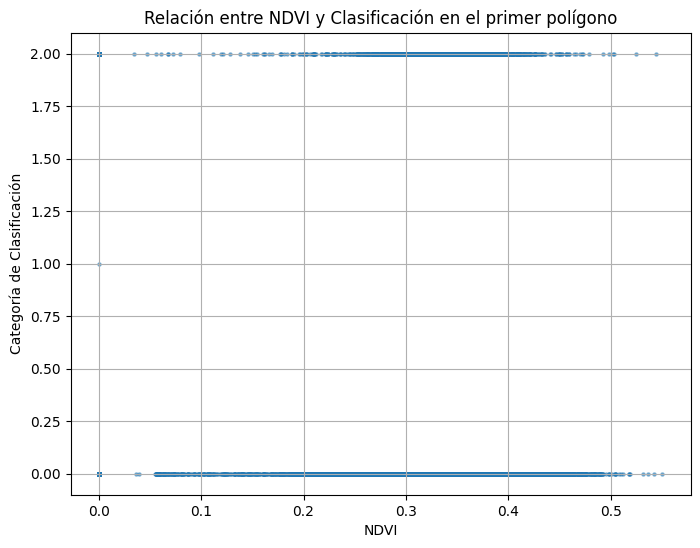

In [100]:
import rasterio
import numpy as np
from rasterio.mask import mask
from shapely.geometry import mapping
import matplotlib.pyplot as plt

# Tomar solo el primer polígono
primer_poligono = [mapping(espacios_verdes_20_Bigger.iloc[0]["geometry"])]

# Abrir las bandas de Sentinel (B8 - NIR y B4 - Rojo)
with rasterio.open('/content/raster_data/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B08_(Raw).tiff') as nir_src, rasterio.open('/content/raster_data/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B04_(Raw).tiff') as red_src:
    B8 = nir_src.read(1).astype('float32')
    B4 = red_src.read(1).astype('float32')

# Calcular NDVI
ndvi = (B8 - B4) / (B8 + B4)
ndvi[np.isnan(ndvi)] = 0  # Reemplazar NaN con 0

# Recortar NDVI con el primer polígono
with rasterio.open('/content/raster_data/2024-09-16-00_00_2025-03-16-23_59_Sentinel-2_L2A_B08_(Raw).tiff') as src:
    ndvi_recortado, _ = mask(src, primer_poligono, crop=True)

# Recortar clasificación con el mismo polígono
clasificacion_recortada = clasificacion[: ndvi_recortado.shape[1], : ndvi_recortado.shape[2]]

# Convertir matrices a arrays 1D
ndvi_values = ndvi_recortado.ravel()
clasif_values = clasificacion_recortada.ravel()

# Asegurar que tienen el mismo tamaño
min_size = min(len(ndvi_values), len(clasif_values))
ndvi_values = ndvi_values[:min_size]
clasif_values = clasif_values[:min_size]

# Calcular correlación
correlacion = np.corrcoef(ndvi_values, clasif_values)[0, 1]

print("Correlación entre NDVI y clasificación dentro del primer polígono:", correlacion)

# Graficar la relación
plt.figure(figsize=(8, 6))
plt.scatter(ndvi_values, clasif_values, alpha=0.5, s=5)
plt.xlabel("NDVI")
plt.ylabel("Categoría de Clasificación")
plt.title("Relación entre NDVI y Clasificación en el primer polígono")
plt.grid(True)
plt.show()


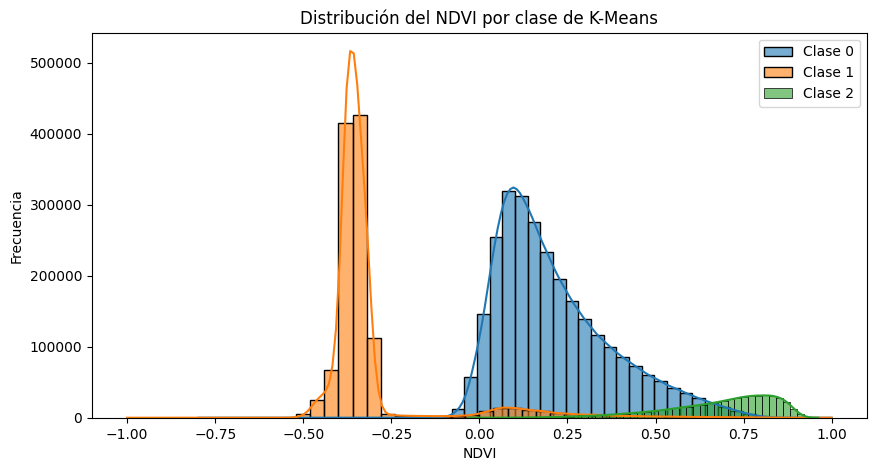

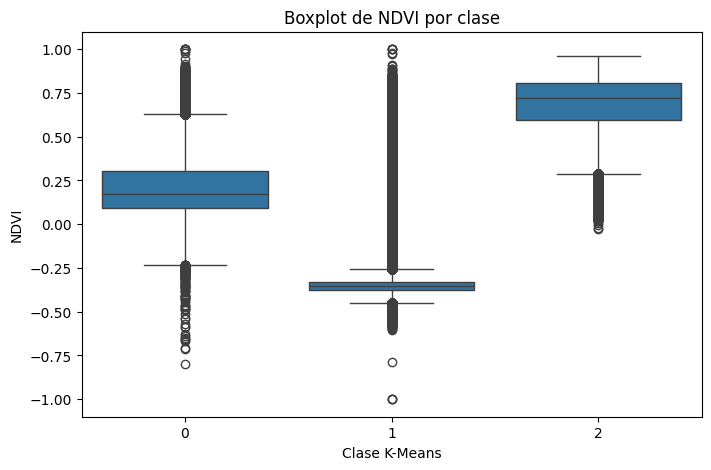

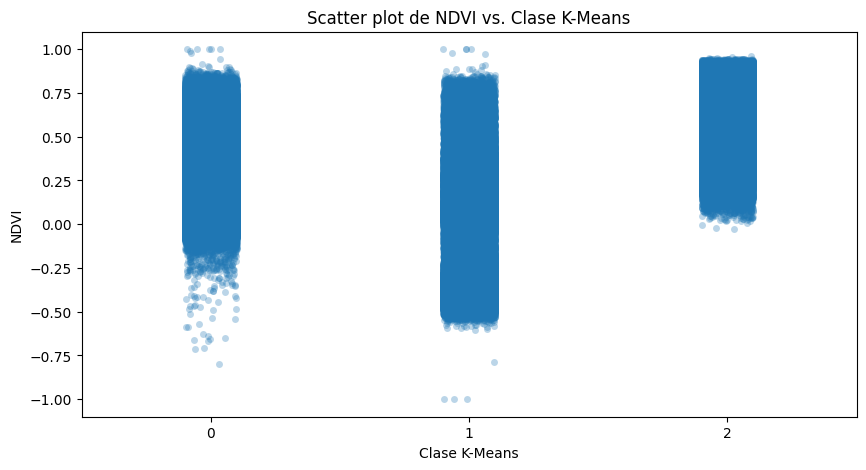

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Aplanar los arrays para análisis
ndvi_flat = ndvi.flatten()
clasif_flat = clasificacion.flatten()

# Filtrar valores NaN (si los hay)
mask = ~np.isnan(ndvi_flat)
ndvi_flat = ndvi_flat[mask]
clasif_flat = clasif_flat[mask]

# Histograma de NDVI por clase
plt.figure(figsize=(10, 5))
for clase in np.unique(clasif_flat):
    sns.histplot(ndvi_flat[clasif_flat == clase], bins=50, label=f'Clase {clase}', kde=True, alpha=0.6)
plt.xlabel("NDVI")
plt.ylabel("Frecuencia")
plt.title("Distribución del NDVI por clase de K-Means")
plt.legend()
plt.show()

# Boxplot de NDVI por clase
plt.figure(figsize=(8, 5))
sns.boxplot(x=clasif_flat, y=ndvi_flat)
plt.xlabel("Clase K-Means")
plt.ylabel("NDVI")
plt.title("Boxplot de NDVI por clase")
plt.show()

# Scatter plot de NDVI vs. clases
plt.figure(figsize=(10, 5))
sns.stripplot(x=clasif_flat, y=ndvi_flat, jitter=True, alpha=0.3)
plt.xlabel("Clase K-Means")
plt.ylabel("NDVI")
plt.title("Scatter plot de NDVI vs. Clase K-Means")
plt.show()


In [114]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# Supongamos que 'ndvi_values' es un array con los valores de NDVI
# y 'clasif_values' es un array con las clases de K-Means

# Convertir a DataFrame para facilitar el análisis
df = pd.DataFrame({'NDVI': ndvi_values, 'Clase': clasif_values})

# Inicializar un diccionario para guardar los resultados
resultados_spearman = {}

# Calcular la correlación de Spearman dentro de cada clase
for clase in df['Clase'].unique():
    subset = df[df['Clase'] == clase]
    if len(subset) > 1:  # Evitar errores con una única observación
        spearman_corr, spearman_p = stats.spearmanr(subset['NDVI'], subset.index)
        resultados_spearman[clase] = (spearman_corr, spearman_p)

# Mostrar resultados
for clase, (corr, pval) in resultados_spearman.items():
    print(f"Clase {clase}: Spearman ρ = {corr:.3f}, p = {pval:.4f}")


Clase 2: Spearman ρ = -0.275, p = 0.0000
Clase 0: Spearman ρ = -0.037, p = 0.0000
